<a href="https://colab.research.google.com/github/cris-her/AI/blob/master/knn_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
warnings.simplefilter("ignore")

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Métodos de evaluación 

In [3]:
X = pd.read_csv('https://raw.githubusercontent.com/cris-her/datasets-platzi-course/master/intermediate_results/X_opening.csv')
y = X['worldwide_gross']
X = X.drop('worldwide_gross',axis=1)

**Validation Curves y Learning Curves**

In [4]:
from sklearn.model_selection import cross_validate
from sklearn.neighbors import KNeighborsRegressor

cross_validate(KNeighborsRegressor(), X, y, cv=5)

{'fit_time': array([0.00343108, 0.0027957 , 0.00267053, 0.00266504, 0.00266433]),
 'score_time': array([0.00340104, 0.0042479 , 0.0040319 , 0.00385642, 0.00327706]),
 'test_score': array([0.3647382 , 0.59274527, 0.21545625, 0.15143495, 0.25635077])}

In [5]:
cross_validate(KNeighborsRegressor(n_neighbors=10), X, y, cv=5)

{'fit_time': array([0.0058744 , 0.00291061, 0.00273705, 0.00268698, 0.00285554]),
 'score_time': array([0.00620675, 0.00500822, 0.00477028, 0.00461197, 0.0040462 ]),
 'test_score': array([0.23553954, 0.61921355, 0.24881301, 0.1209604 , 0.2466995 ])}

In [6]:
n = np.arange(2,50,2)
n

array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34,
       36, 38, 40, 42, 44, 46, 48])

In [7]:
n.shape

(24,)

In [8]:
from sklearn.model_selection import validation_curve

train_scores, test_scores = validation_curve(KNeighborsRegressor(),
                                            X,
                                            y,
                                            param_name='n_neighbors',
                                            param_range=n,
                                            cv=5)

In [9]:
np.mean(train_scores,axis=1)

array([0.86831591, 0.79120817, 0.7593398 , 0.7498298 , 0.74238245,
       0.73284018, 0.72586058, 0.71779833, 0.71281982, 0.70976325,
       0.70723469, 0.70502429, 0.70174649, 0.69741543, 0.69379214,
       0.69163113, 0.68955146, 0.6862285 , 0.68321376, 0.68018032,
       0.67885534, 0.67522056, 0.67135123, 0.66953759])

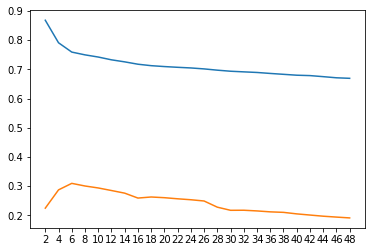

In [10]:
plt.plot(np.mean(train_scores,axis=1))
plt.plot(np.mean(test_scores,axis=1))
plt.xticks(np.arange(24),n);

In [11]:
from sklearn.model_selection import learning_curve

lc = learning_curve(KNeighborsRegressor(n_neighbors=6),X,y,cv=5)
samples, train, test = lc[0], lc[1], lc[2]

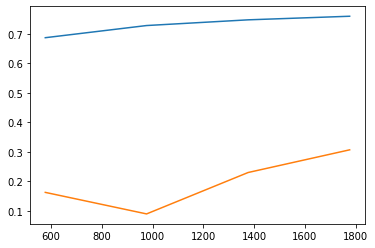

In [12]:
plt.plot(samples[1:],np.mean(train,axis=1)[1:])
plt.plot(samples[1:],np.mean(test,axis=1)[1:])

---

<img src="https://raw.githubusercontent.com/cris-her/machine-learning-platzi/master/img/learning_curve.png" width=500>

El modelo aún está aprendiendo, sin embargo no tenemos como obtener datos adicionales.

**Como solucionar el overfitting y el underfitting?**

Viarianza Alta:

- Conseguir más ejemplos
- Reducir cantidad de features
- Aumentar coeficiente de regularización

Bias Alto:

- Más features
- Modelo más complejo

Mal resultado general:

- Probar otro algoritmo/familia de modelos, quizás las hipotesis del modelo no son cumplidad por tu dataset